# Latent Dirichlet Allocation For Topic Modelling

In [1]:
import pandas as pd
import datetime as dt
import numpy as np

## Read data

In [2]:
url = 'https://raw.githubusercontent.com/maeeemaay/Twitter/master/twitter.csv'
tweet = pd.read_csv(url)

In [3]:
tweet

,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,links,...,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
0,4waySushii,R A S U U,153478875,1208537265632358400,/4waySushii/status/1208537265632358400,2019-12-21 23:58:32,1576972712,Attention #Artists #DJs #Producers - #Coast2Co...,"<p class=""TweetTextSize js-tweet-text tweet-te...",['http://c2c.fm/x6M9T'],...,False,[],NaN,0,0,0,False,False,NaN,[]
1,TimBewer,Tim Bewer,3227956975,1208536235901194240,/TimBewer/status/1208536235901194240,2019-12-21 23:54:26,1576972466,"I took this photo a few days ago in Chaiburi, ...","<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,True,['https://pbs.twimg.com/media/EMWVS01UwAE3KXH....,NaN,2,0,0,False,False,NaN,[]
2,daytradesignals,Day Trade Ideas,879275964,1208533584216088576,/daytradesignals/status/1208533584216088576,2019-12-21 23:43:54,1576971834,Penguin stainless steel wraps every single cut...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,True,['https://pbs.twimg.com/media/EMWS4OYVAAASfOP....,NaN,0,0,0,False,True,1.206797e+18,"[{'screen_name': 'ThaigerNews', 'user_id': '94..."
3,OssieSaints,Simon Osgood,217706107,1208532619782000640,/OssieSaints/status/1208532619782000640,2019-12-21 23:40:04,1576971604,Smiles all round #food #football #saintsfc #wi...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,True,['https://pbs.twimg.com/media/EMWSAZMU0AAIdPz....,NaN,1,0,0,False,False,NaN,[]
4,aryanthepoet,Aryan Kaul,1003359470116835328,1208532113466654720,/aryanthepoet/status/1208532113466654720,2019-12-21 23:38:03,1576971483,Landed in Bangkok!!! I have just been greeted ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,True,['https://pbs.twimg.com/media/EMWRiJSU8AA0vP1....,NaN,7,1,0,False,False,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10090,rebeccalucyh,Rebecca Hawkes,780132906895310848,1195381948203466752,/rebeccalucyh/status/1195381948203466752,2019-11-15 16:44:00,1573836240,I’d been in Thailand for eight days and had su...,"<p class=""TweetTextSize js-tweet-text tweet-te...",['https://medium.com/@rebeccalucyh/we-didnt-pl...,...,False,[],NaN,0,1,0,False,False,NaN,[]
10091,NinetoFiveisaac,Isaac Sagastume,1040525454,1195380401092669440,/NinetoFiveisaac/status/1195380401092669440,2019-11-15 16:37:51,1573835871,A very peaceful and warm place...\n#film #film...,"<p class=""TweetTextSize js-tweet-text tweet-te...",['https://www.instagram.com/p/B45J7hYhsXs/?igs...,...,False,[],NaN,0,0,0,False,False,NaN,[]
10092,ThailandElephan,Thailand Elephants,3387232205,1195378376065912834,/ThailandElephan/status/1195378376065912834,2019-11-15 16:29:48,1573835388,Elephant riding makes @fodorstravel's 'No List...,"<p class=""TweetTextSize js-tweet-text tweet-te...",['https://www.fodors.com/news/photos/fodors-no...,...,True,['https://pbs.twimg.com/media/EJbWS4LXUAI5m_V....,NaN,3,0,0,False,False,NaN,[]
10093,history_travels,TravelingThruHistory,2717537846,1195377672961937409,/history_travels/status/1195377672961937409,2019-11-15 16:27:00,1573835220,Ananta Samakhom Throne Hall is a fascinating a...,"<p class=""TweetTextSize js-tweet-text tweet-te...",['http://wp.me/p4V5Ft-9b'],...,True,['https://pbs.twimg.com/media/EJbVqKBUcAAZWOu....,NaN,0,0,0,False,False,NaN,[]


In [4]:
# Drop unused columns
tweet = tweet.drop(columns={'timestamp_epochs','hashtags','has_media','screen_name','username','user_id','tweet_id','tweet_url','text_html','links','is_replied','likes','retweets','replies','is_reply_to','parent_tweet_id','reply_to_users','img_urls','video_url'})

In [5]:
tweet = tweet.sort_values('timestamp')

In [6]:
tweet['timestamp'] = pd.to_datetime(tweet['timestamp'])

In [7]:
# remove time in timestamp
tweet['timestamp'] = tweet['timestamp'].dt.date

In [8]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10095 entries, 8073 to 6051
Data columns (total 2 columns):
timestamp    10095 non-null object
text         10095 non-null object
dtypes: object(2)
memory usage: 236.6+ KB


In [9]:
# drop duplicated data
tweet.drop_duplicates(subset ='text', keep = 'first', inplace = True)

In [10]:
tweet.index = pd.RangeIndex(len(tweet.index))

In [11]:
tweet

,timestamp,text
0,2019-06-01,Champions league final!\n~\nTottenham v Liverp...
1,2019-06-01,Just horsing around this morning. #thailand #t...
2,2019-06-01,APAC Top 1000 Innovators Ranked by Crunchbase ...
3,2019-06-01,Are you looking for a house or condo either to...
4,2019-06-01,"Good morning @Thairath_News, great to see #Tha..."
...,...,...
9634,2020-03-31,Where in the world is Shelly?\nKhoa Yai Nation...
9635,2020-03-31,#Thailand PM Prayut warns 'ineligible' will ha...
9636,2020-03-31,You may have heard of HG Wells’s “War of the W...
9637,2020-03-31,World Bank: Southeast Asia Faces Recession ove...


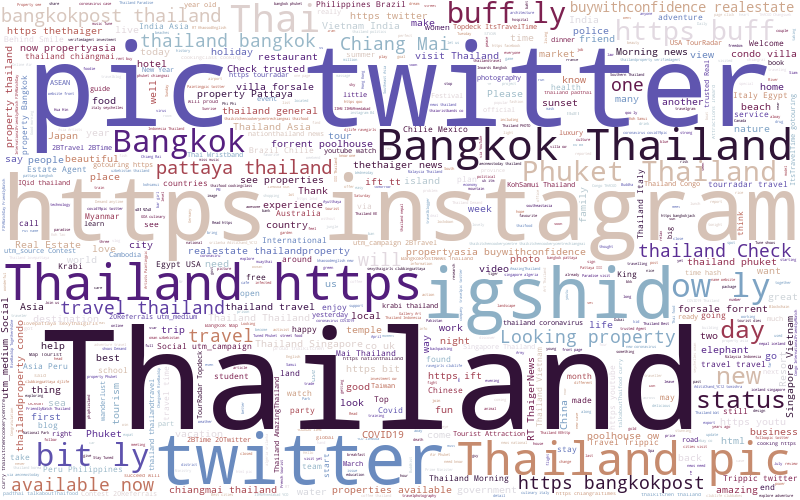

In [41]:
# Visualize the word cloud
from wordcloud import WordCloud

long_string = ','.join(list(tweet.text.values))
wordcloud = WordCloud(background_color="white",
                      width=800,
                      height=500,
                      max_words=1000,
                      contour_width=3,
                      colormap='twilight')

wordcloud.generate(long_string)
wordcloud.to_image()

# Data pre-processing

In [13]:
import re
import nltk
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 

In [14]:
punctuation = list(punctuation)

In [15]:
punctuation.append('“')
punctuation.append('”')
punctuation.append('‘')
punctuation.append('’')
punctuation.append('…')
punctuation.append('...')
punctuation.append('``')

In [16]:
removed_list = [
    'thailand',
    'twitter',
    'com',
    'pic',
    'thai',
    'via'
   ]

In [17]:
def preprocess(txt):
    list_to_remove = set(stopwords.words('english') + punctuation + removed_list)
    
    txt = txt.lower() # convert text to lower-case
    txt = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', txt) # remove URLs
    txt = re.sub('@[^\s]+', '', txt) # remove usernames
    txt = re.sub('(pic\.[^\s]+)', '', txt) # remove pic tweet URLs
    txt = re.sub('[^\w\s]', ' ', txt)
    txt = re.sub(r'#([^\s]+)', r'\1', txt) # remove the # in #hashtag
    txt = word_tokenize(txt) 
    txt = [i for i in txt if i not in list_to_remove]
    
    
    return txt

In [18]:
tweet['cleaned_text'] = tweet['text'].apply(preprocess)

In [19]:
from nltk.corpus import wordnet
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
lemmatizer = WordNetLemmatizer()

nltk.download('averaged_perceptron_tagger')

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize(row):
    out = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in row]
    return out

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [21]:
tweet['lemmatize'] = tweet['cleaned_text'].apply(lemmatize)

In [22]:
tweet

,timestamp,text,cleaned_text,lemmatize
0,2019-06-01,Champions league final!\n~\nTottenham v Liverp...,"[champions, league, final, tottenham, v, liver...","[champion, league, final, tottenham, v, liverp..."
1,2019-06-01,Just horsing around this morning. #thailand #t...,"[horsing, around, morning, travel, travelthewo...","[horse, around, morning, travel, traveltheworl..."
2,2019-06-01,APAC Top 1000 Innovators Ranked by Crunchbase ...,"[apac, top, 1000, innovators, ranked, crunchba...","[apac, top, 1000, innovator, ranked, crunchbas..."
3,2019-06-01,Are you looking for a house or condo either to...,"[looking, house, condo, either, rent, buy, che...","[look, house, condo, either, rent, buy, check,..."
4,2019-06-01,"Good morning @Thairath_News, great to see #Tha...","[good, morning, great, see, celebrating, world...","[good, morning, great, see, celebrate, worldmi..."
...,...,...,...,...
9634,2020-03-31,Where in the world is Shelly?\nKhoa Yai Nation...,"[world, shelly, khoa, yai, national, park, wri...","[world, shelly, khoa, yai, national, park, wri..."
9635,2020-03-31,#Thailand PM Prayut warns 'ineligible' will ha...,"[pm, prayut, warns, ineligible, aid, money, co...","[pm, prayut, warns, ineligible, aid, money, co..."
9636,2020-03-31,You may have heard of HG Wells’s “War of the W...,"[may, heard, hg, wells, war, worlds, introduce...","[may, heard, hg, well, war, world, introduces,..."
9637,2020-03-31,World Bank: Southeast Asia Faces Recession ove...,"[world, bank, southeast, asia, faces, recessio...","[world, bank, southeast, asia, face, recession..."


### Check

In [23]:
from nltk.probability import FreqDist
fdist = FreqDist()
for row in tweet['lemmatize']:
    row = pd.Series(row)
    for word in row.items():
        fdist[word[1]] += 1    

In [24]:
fdist = pd.DataFrame(list(fdist.items()), columns = ["Word","Frequency"])

In [25]:
fdist.sort_values('Frequency',ascending=False).head(10)

,Word,Frequency
163,bangkok,2110
21,travel,1485
389,phuket,905
79,pattaya,866
53,property,833
45,look,616
148,asia,557
35,new,518
58,see,510
331,day,476


# Model

In [26]:
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD # for LDA model
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # for create word matrix
from sklearn.model_selection import GridSearchCV # for find the best LDA model
from pprint import pprint

In [27]:
processed_docs = tweet['lemmatize'].astype(str)
processed_docs

0       ['champion', 'league', 'final', 'tottenham', '...
1       ['horse', 'around', 'morning', 'travel', 'trav...
2       ['apac', 'top', '1000', 'innovator', 'ranked',...
3       ['look', 'house', 'condo', 'either', 'rent', '...
4       ['good', 'morning', 'great', 'see', 'celebrate...
                              ...                        
9634    ['world', 'shelly', 'khoa', 'yai', 'national',...
9635    ['pm', 'prayut', 'warns', 'ineligible', 'aid',...
9636    ['may', 'heard', 'hg', 'well', 'war', 'world',...
9637    ['world', 'bank', 'southeast', 'asia', 'face',...
9638    ['good', 'bye', 'march', 'hello', 'april', 'pl...
Name: lemmatize, Length: 9639, dtype: object

# Create the Document-Word matrix

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [28]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum reqd occurences of a word 
                             token_pattern='[a-zA-Z0-9]{3,}')  # num chars > 3                            

data_vectorized = vectorizer.fit_transform(processed_docs)

In [29]:
# Materialize the sparse data
data_dense = data_vectorized.todense()
print(data_dense)

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Sparsicity:  0.43112107447519027 %


In [30]:
words = vectorizer.get_feature_names()
len(words)

2170

# GridSearch

In [31]:
# Define Search Param
search_params = {'n_components': [3, 4, 5, 6, 7, 8, 9, 10], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                   

In [32]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 3}
Best Log Likelihood Score:  -243865.19146355457
Model Perplexity:  1118.5545591403627


## Compare the LDA performance score


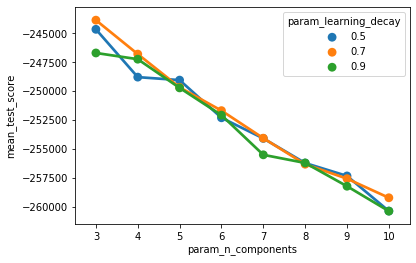

In [33]:
import seaborn as sns
df_cv_results = pd.DataFrame(model.cv_results_)
sns.pointplot(x="param_n_components", y="mean_test_score", hue="param_learning_decay", data=df_cv_results);

# Find dominant topic in each document

In [34]:
lda_output = best_lda_model.transform(data_vectorized)
topicnames = ['Topic' + str(i) for i in range(best_lda_model.n_components)]
docnames = ['Doc' + str(i) for i in range(len(processed_docs))]
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

def color(val):
    color = 'indianred' if val > .1 else 'slategray'
    return 'color: {col}'.format(col=color)
def make_bold(val):
    weight = 800 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

df_document_topics = df_document_topic.head(15).style.applymap(color).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,dominant_topic
Doc0,0.03,0.4,0.56,2
Doc1,0.22,0.08,0.7,2
Doc2,0.24,0.74,0.02,1
Doc3,0.96,0.02,0.02,0
Doc4,0.19,0.05,0.76,2
Doc5,0.87,0.02,0.11,0
Doc6,0.32,0.56,0.11,1
Doc7,0.03,0.94,0.03,1
Doc8,0.07,0.02,0.91,2
Doc9,0.27,0.07,0.66,2


In [35]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,2,4244
1,1,4005
2,0,1390


# Visualize the LDA model

In [36]:
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\acer\Anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [37]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer, mds='tsne')
panel

C:\Users\acer\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                 x           y  topics  cluster       Freq
topic                                                     
1      -632.045471 -384.325073       1        1  40.091733
2     -1209.665405  212.164124       2        1  39.929885
0     -1437.453247 -586.322510       3        1  19.978382, topic_info=     Category        Freq       Term       Total  loglift  logprob
1502  Default  849.000000   property  849.000000  30.0000  30.0000
1138  Default  627.000000       look  627.000000  29.0000  29.0000
1679  Default  519.000000        see  519.000000  28.0000  28.0000
340   Default  440.000000      check  440.000000  27.0000  27.0000
421   Default  348.000000      condo  348.000000  26.0000  26.0000
...       ...         ...        ...         ...      ...      ...
1382   Topic3  249.698591    pattaya  861.956521   0.3716  -4.3567
1729   Topic3  148.918328  singapore  325.682417   0.8280  -4.8736
900    Topic3  121.410855       home  212.671373   1.0500  -5.0778
952    Topic3  130.579812      india  308.298958   0.7514  -5.0050
1417   Topic3  160.982191     phuket  882.874733  -0.0914  -4.7957

[203 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
10        1  0.464048       2019
10        2  0.350225       2019
10        3  0.186787       2019
48        1  0.156894  adventure
48        2  0.839044  adventure
...     ...       ...        ...
2129      2  0.009324      woman
2129      3  0.018647      woman
2144      1  0.991012  wristband
2155      1  0.876537       year
2155      2  0.122089       year

[271 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

In [38]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,property,look,see,check,bangkok,condo,realestate,propertyasia,available,elephant,villa,pattaya,asia,buywithconfidence,thailandproperty
Topic 1,bangkok,phuket,travel,coronavirus,one,china,covid19,food,new,year,temple,japan,covid,malaysia,vietnam
Topic 2,bangkok,travel,pattaya,day,holiday,beach,get,chiang,island,hotel,tour,mai,chiangmai,time,good


# Predict topics for new text

In [39]:
def predict_topic(text):
    mytext_1 = preprocess(text)
    mytext_2 = lemmatize(mytext_1)
    mytext_3 = vectorizer.transform(mytext_2)
    topic_probability_scores = best_lda_model.transform(mytext_3)
    #topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores)%3,:].values.tolist()
    topic = df_topic_keywords.index[np.argmax(topic_probability_scores)%3]
    return topic, topic_probability_scores

In [42]:
# Predict the topic
mytext = input()
topic, prob_scores = predict_topic(text = mytext)
print('Topic prediction : ',topic)
print('probability score :', prob_scores)

Emergency decree extened to May , Thai government announced on Monday #thailand #Khaodsod
Topic prediction :  Topic 1
probability score : [[0.16731975 0.66050793 0.17217232]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.17134587 0.20142501 0.62722912]
 [0.21151158 0.20725054 0.58123787]
 [0.21512496 0.19539524 0.5894798 ]
 [0.16700214 0.65535143 0.17764643]
 [0.33333333 0.33333333 0.33333333]]
